<a href="https://colab.research.google.com/github/Aditya0134/Project-N-body-problem/blob/main/Physics_project_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Appendix**

### **Implementation in Python: A numerical simulation of the sun and 8 planets**

---



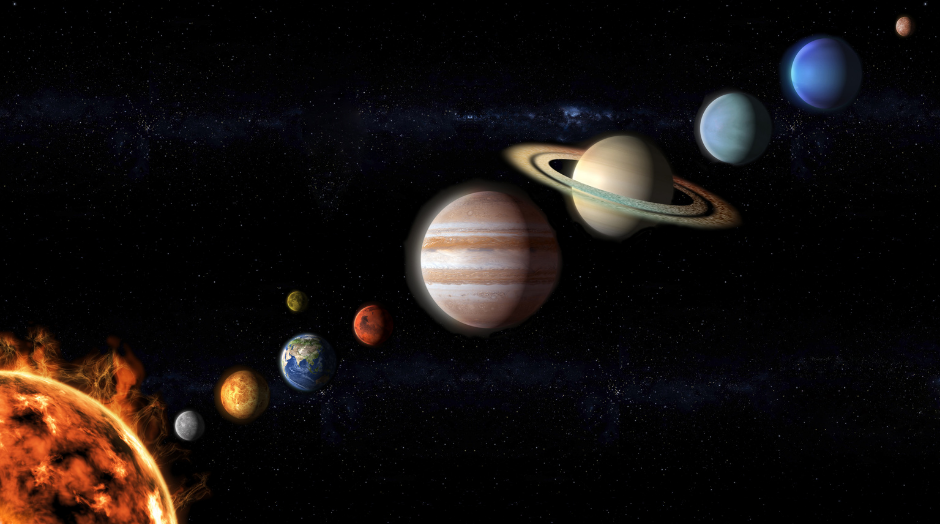

Time scale is taken as 1 day, Mass scale is taken as 1 kg, Distance scale is taken as 1km = 1000m

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import pi, log, sin, cos, tan, dot, sqrt, amin, argmin
from tqdm import tqdm

from google.colab import files

#importing the relevant modules

In [5]:
N = 9
t_f = 365*1000 ; dt = 1
n_steps = int(t_f/dt)

pos = np.zeros((N, 3, n_steps))
vel = np.zeros((N, 3, n_steps))

M = np.zeros(N) ; T = np.zeros(n_steps)
Es = np.zeros(n_steps)
G = 7.46496*6.6743e-11

#defining variables and relavent arrays

In [6]:

#defining acceleration function

def acc(r):
  accs = np.zeros((N, 3))
  for i in range(N):
    for j in range(N):
      if i==j:
        continue
      #dist = ((r[i, 0] - r[j, 0])**2 + (r[i, 1] - r[j, 1])**2 + (r[i, 2] - r[j, 2])**2)**1.5
      mag = np.linalg.norm(r[i, :] - r[j, :])**3
      accs[i, :] -= G*M[j]*(r[i, :] - r[j, :])/mag

  return accs

# defining distance function between any two bodies
def dist(r1, r2):
  x1 = r1[0, :] ; y1 = r1[1, :] ; z1 = r1[2, :]
  x2 = r2[0, :] ; y2 = r2[1, :] ; z2 = r2[2, :]

  return sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)

# defining function used to construct 3D graphs
def axisEqual3D(ax):
    extents = np.array([getattr(ax, 'get_{}lim'.format(dim))() for dim in 'xyz'])
    sz = extents[:,1] - extents[:,0]
    centers = np.mean(extents, axis=1)
    maxsize = max(abs(sz))
    r = maxsize/2
    for ctr, dim in zip(centers, 'xyz'):
        getattr(ax, 'set_{}lim'.format(dim))(ctr - r, ctr + r)

In [7]:
def energy(pos, vels):
    K = np.zeros(N) #kinetic energy vector
    v = np.zeros(N) #velocity magnitudes vector
    for i in range(N):
        #looping through all bodies
        v[i] = np.sqrt(vels[i, 0]**2 + vels[i, 1]**2 + vels[i, 2]**2)
        K[i] = 0.5*M[i]*(v[i]**2)

    KE = sum(K) #net kinetic energy

    U = 0
    for i in range(N):
        for j in range(N):
            if i==j:
                continue
        mag = np.sqrt((pos[i, 0]-pos[j, 0])**2 + (pos[i, 1]-pos[j, 1])**2 + (pos[i, 2]-pos[j, 2])**2 + 0.00000000001)
        U -= (G*M[i]*M[j])/(mag) #summing all the pairs

        U /= 2 #dividing by 2 since we have taken both (ij)th pair and (ji)th pair
    E = KE + U #net energy:pure number
    return E

In [8]:
########## initial conditions ################

labels = np.array(["Sun", "Mercury", "Venus", 'Earth', "Mars", "Jupiter", "Saturn", "Uranus", "Moon"])#"Neptune", "Apophis", "(153814) 2001 WN5", "Moon"])

pos[:, :, 0] = np.array([[-1.283674643550172E+06, 5.007104996950605E+05, 2.589397504295033E+04], #sun
                         [5.242617205495467E+07, -5.596063357617276E+06, -5.398976570474024E+06],#mercury
                         [-1.143612889654620E+07, 1.076180391552140E+08, 2.081921801192194E+06], #Venus
                         [-2.741147560901964E+07, 1.452697499646169E+08, 1.907499306293577E+04], #Earth
                         [-1.309510737126251E+08, -1.893127398896606E+08, -7.714450109843910E+05], #Mars
                         [6.955554713494443E+08, -2.679620040967891E+08, -1.444959769995748E+07], #Jupiter
                         [1.039929082221698E+09, -1.056650148100382E+09, -2.303098768547428E+07], #Saturn
                         [2.152570437700128E+09, 2.016888245555490E+09, -2.039611192913723E+07], #Uranus
                         [4.431790029647159E+09, -6.114486878261740E+08, -8.954348455674592E+07], #Neptune
                         #[-1.374227339344931E+08, 9.217380064616692E+07, -8.087195230971836E+06], #Apophis
                         #[1.491084821760134E+08, 6.028067696074961E+07, 5.281045587295868E+06], #(153814) 2001 WN5
                         #[-2.750334415265606E+07, 1.449229071220244E+08, 1.107672420730442E+04], #Moon
                         ])

vel[:, :, 0] = np.array([[-5.019295380885061E+02, -1.263133074147935E+03, 2.171625501915385E+01], #sun
                         [-3.397005959379320E+05, 4.368914457213522E+06, 3.882579955574663E+05], #mercury
                         [-3.023100172100926E+06, -3.031786015822685E+05, 1.702954438556494E+05], #Venus
                         [-2.576276515113340E+06, -4.679009228519732E+05, 1.538815887902331E+02], #Earth
                         [1.806619223120425E+06, -1.002675098466821E+06, -6.529404814217138E+04], #Mars
                         [3.922225307279247E+05, 1.106363406899722E+06, -1.336746412958131E+04], #Jupiter
                         [5.482209612821676E+05, 5.837285384965794E+05, -3.200642378088534E+04], #Saturn
                         [-4.065857480822041E+05, 4.019452970432451E+05, 6.757969879198768E+03], #Uranus
                         [6.105238847525476E+04, 4.680351850312631E+05, -1.098472428723702E+04], #Neptune
                         #[-1.270786116561084E+06, -1.807450999667723E+06, 6.621750296152751E+04], #Apophis
                         #[-1.825406569232389E+05, 2.885651793261423E+06, 6.464974023978976E+03], #(153814) 2001 WN5
                         #[-2.484602418247434E+06, -4.901583237331588E+05, -8.094399213344781E+03] #Moon
                         ])


M = np.array([1988500e24, 3.302e23, 48.685e23, 5.97219e24, 0.64171e24, 189818722e19, 5.6834e26, 86.813e24, 102.409e24])#26.99e9, 43.77e9,  7.349e22 ])
Es[0] = energy(pos[:, :, 0], vel[:, :, 0])

In [9]:
# NUMERICAL ALGORITHM LOOP

for t in tqdm(range(n_steps-1)):

  v_temp = vel[:, :, t] + dt/2 * acc(pos[:, :, t])
  #print(pos)
  pos[:, :, t+1] = pos[:, :, t] + dt*v_temp
  vel[:, :, t+1] = v_temp + dt/2 * acc(pos[:, :, t+1])

  T[t+1] = T[t] + dt

  Es[t+1] = energy(pos[:, :, t+1], vel[:, :, t+1])

  1%|▏         | 5167/364999 [00:22<26:40, 224.82it/s]


KeyboardInterrupt: 

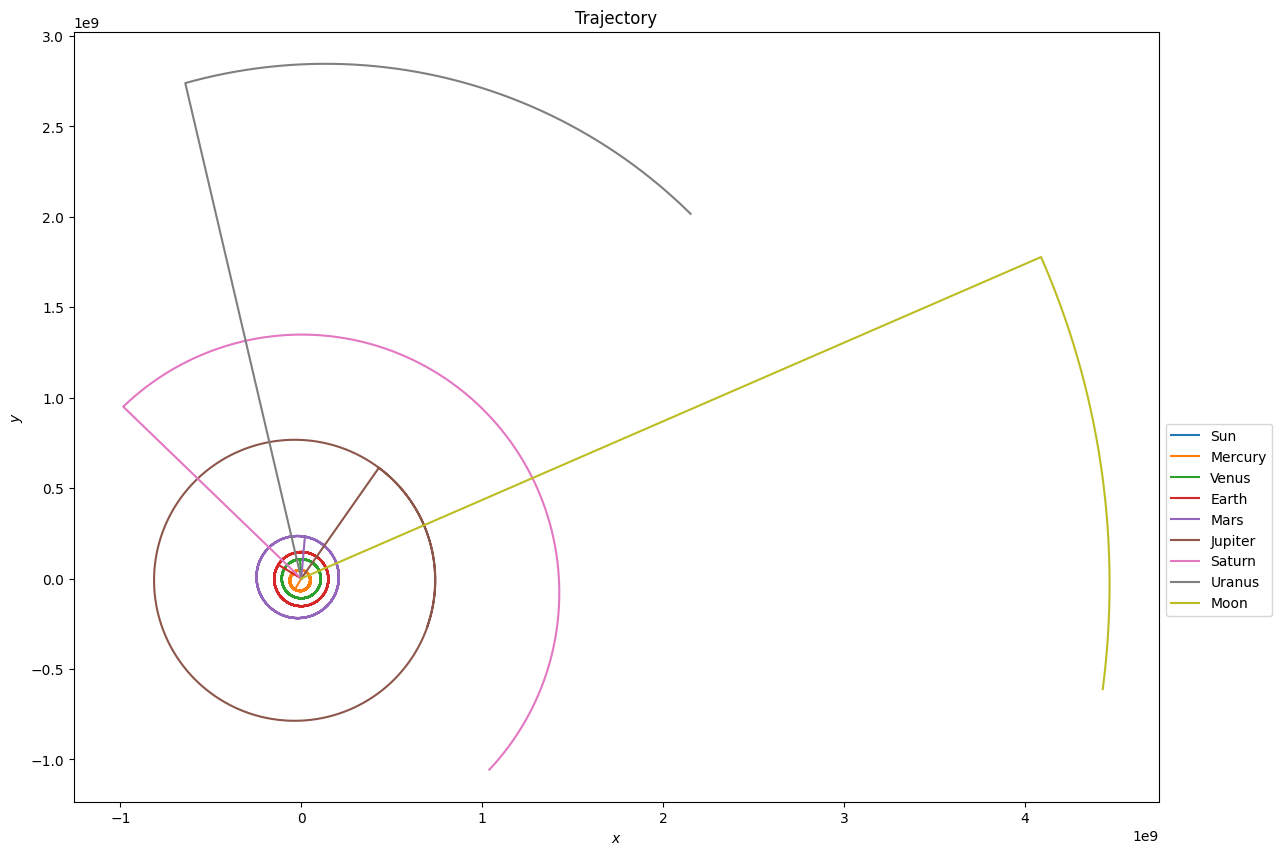

In [10]:
# Plotting the trajectory of the planets

fig = plt.figure(figsize=(14, 10))
for i in range(N):
  plt.plot(pos[i, 0, :], pos[i, 1, :], label=labels[i])
plt.axis('equal')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.xlabel(r'$x$') ; plt.ylabel(r'$y$')
plt.title('Trajectory')

plt.savefig('Trajectory.jpg')

In [ ]:
files.download('Trajectory.jpg')

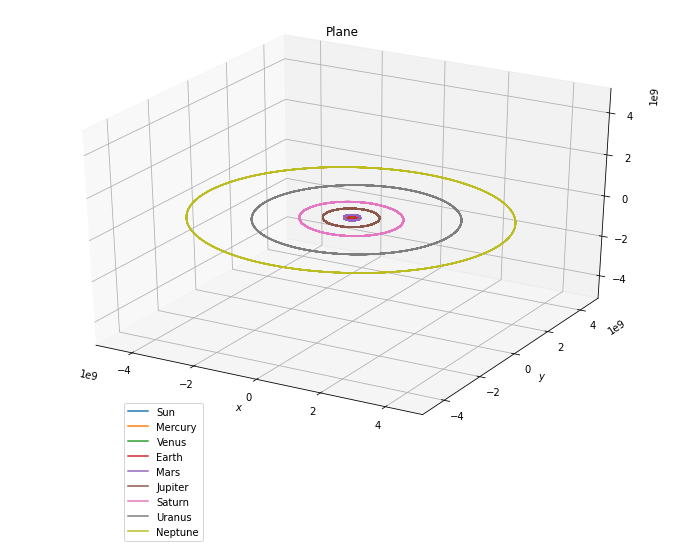

In [ ]:
#Plotting the plane

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')

labels = np.array(["Sun", "Mercury", "Venus", 'Earth', "Mars", "Jupiter", "Saturn", "Uranus", "Neptune", "Moon"])#"Apophis", "(153814) 2001 WN5", "Moon"])

for i in range(N):
  ax.plot3D(pos[i,0,:], pos[i,1,:], pos[i,2,:], label = labels[i])
  ax.legend()

axisEqual3D(ax)
plt.grid()
#plt.axis('equal')
plt.legend(bbox_to_anchor=(0.3, 0.1))
plt.xlabel(r'$x$') ; plt.ylabel(r'$y$')
plt.title('Plane')

plt.savefig('3D.png')

In [ ]:
files.download('3D.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Plotting the Earth and Asteroids plane

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')

ax.plot3D(pos[3,0,:], pos[3,1,:], pos[3,2,:], label ='Earth')
ax.plot3D(pos[-3,0,:], pos[-3,1,:], pos[-3,2,:],label = 'Apophis')
ax.plot3D(pos[-2,0,:], pos[-2,1,:], pos[-2,2,:], label = labels[-2])

#plt.axis('equal')
plt.legend(bbox_to_anchor=(0.3, 0.1))
plt.xlabel(r'$x$') ; plt.ylabel(r'$y$')
plt.title('Earth and Asteroids plane')

axisEqual3D(ax)
plt.grid()
plt.savefig('Ast3D.jpg')

In [ ]:
files.download('Ast3D.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# plotting apophis

fig = plt.figure(figsize=(12, 8))
plt.plot(pos[3, 0, :], pos[3, 1, :], label=labels[3])
plt.plot(pos[-3, 0, :], pos[-3, 1, :], label=labels[-3])

plt.plot(pos[-2, 0, :], pos[-2, 1, :], label=labels[-2])

plt.legend()

plt.savefig('Apophis.jpg')

In [ ]:
files.download('Apophis.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dist1 = dist(pos[3, :, :], pos[-3, :, :])
dist2 = dist(pos[3, :, :], pos[-2, :, :])

# defining distance between the asteroids and Earth

In [ ]:
#plotting distances between Earth and asteroids

#plt.plot(T, dist1)
plt.plot(T, dist2)

#plt.ylim(0e8, 1e8) ; plt.xlim(2000, 3000)
#plt.savefig('Apophisdist.jpg')
plt.savefig('WN5dist.jpg')

In [ ]:
#files.download('Apophisdist.jpg')
files.download('WN5dist.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
T[argmin(dist1)] #minimum distance between Earth and Apohphis

In [ ]:
T[argmin(dist2)] #minimum distance between Earth and WN5

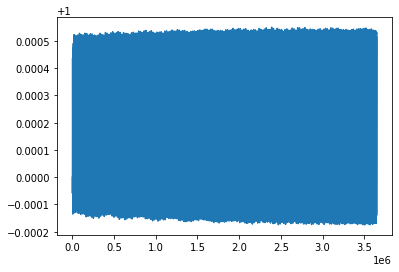

In [ ]:
plt.plot(T, Es/Es[0])
plt.savefig('Energy.jpg')
# Plotting Energy change

In [ ]:
files.download('Energy.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Calculting Perihelions and Aphelions of Earth

dists = np.zeros((N, n_steps))

for i in range(1,N):
  dists[i, :] = dist(pos[0, :, :], pos[i, :, :])

def calc(dists):
  apilist = np.zeros((N-1, n_steps))
  perilist = np.zeros((N-1, n_steps))
  for n in range(N-1):
    for i in range(1, n_steps-1):
      if dists[n, i-1] < dists[n, i] and dists[n, i] > dists[n, i+1]:
        apilist[n, i] = dists[n, i]
      elif dists[n, i-1] > dists[n, i] and dists[n, i] < dists[n, i+1]:
        perilist[n, i] = dists[n, i]
  return perilist, apilist

perlist, aplist = calc(dists)

In [ ]:
periearth = perlist[3, np.nonzero(perlist[3, :])]
apiearth = aplist[3, np.nonzero(aplist[3, :])]
print (periearth.shape)
#print(periearth)
#print(apiearth)


In [ ]:
plt.plot(aplist[3, np.nonzero(aplist[3, :])][0])
#plt.plot(perlist[3, np.nonzero(perlist[3, :])][0])

[0.01672615 0.01671985 0.01672189 ... 0.01778254 0.01780509 0.01779471]


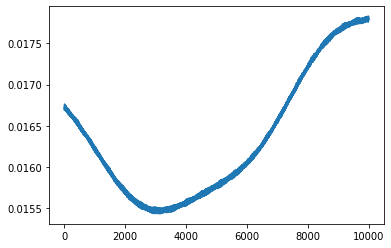

In [ ]:
# calculating and plotting the eccentricity of Earths axis
ecc = np.array(np.zeros(9994))
for i in range(9994):
  ecc[i] = 1-(2/((apiearth[0,i]/periearth[0,i])+1))
print(ecc)
plt.plot(ecc)
plt.savefig('Ecc.jpg')

In [ ]:
files.download('Ecc.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>